In [1]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_Faulty_Training.RData')['faulty_training']

In [3]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


# Drop the corelated features

In [6]:
reduced_data = DF[DF['simulationRun']==45]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

reduced_data

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
22000,0.0,45.0,1,0.24930,3680.9,4542.4,9.3830,27.074,42.551,2703.2,...,53.584,24.764,62.306,22.132,40.056,37.171,48.426,47.250,41.157,17.885
22001,0.0,45.0,2,0.24940,3659.3,4507.5,9.4889,26.396,42.000,2705.1,...,54.002,24.754,59.889,22.301,40.105,40.245,45.158,47.551,40.832,17.090
22002,0.0,45.0,3,0.25103,3668.2,4492.4,9.3512,27.160,42.014,2705.9,...,54.181,24.602,63.588,22.195,39.859,39.300,48.568,47.382,41.685,18.890
22003,0.0,45.0,4,0.25400,3656.8,4521.1,9.2987,26.992,42.221,2706.9,...,53.838,24.309,62.889,22.693,40.192,43.867,48.329,47.454,41.340,17.910
22004,0.0,45.0,5,0.24469,3600.2,4581.0,9.3536,26.845,42.100,2707.4,...,54.263,24.407,59.912,22.551,42.661,37.797,46.689,47.448,41.627,18.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,20.0,45.0,496,0.29593,3659.6,4494.3,9.3698,26.634,42.439,2709.7,...,54.065,29.183,58.817,16.333,41.184,38.649,47.405,41.207,40.989,19.911
449996,20.0,45.0,497,0.22167,3675.3,4477.6,9.1923,26.784,42.196,2708.3,...,53.903,21.615,60.952,16.376,41.158,38.065,45.823,41.162,40.222,17.884
449997,20.0,45.0,498,0.21929,3654.0,4490.3,9.3845,26.527,42.129,2708.6,...,53.752,21.850,59.784,15.833,41.175,36.672,43.213,41.197,41.059,19.269
449998,20.0,45.0,499,0.26209,3616.4,4522.6,9.2603,27.026,41.635,2706.8,...,54.074,25.550,61.412,15.086,38.036,34.771,46.070,41.589,41.187,18.058


# Scale the dataset

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

sc.fit(reduced_data.iloc[:,3:])


StandardScaler()

In [8]:
reduced_data = DF.loc[(DF['simulationRun'] >= 1) & (DF['simulationRun'] <= 50)]
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

X = sc.transform(reduced_data[reduced_data['sample']>20].iloc[:,3:])
Y = reduced_data[reduced_data['sample']>20]['faultNumber'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(Y.reshape(-1, 1))

Y_enc = enc.transform(Y.reshape(-1, 1))

In [9]:
Y_enc.shape

(432000, 18)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [11]:
y_train.shape

(345600, 18)

In [12]:
type(y_train)

numpy.ndarray

In [13]:
x_train.shape[1]

52

# Train the Neural Network algorithms

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input layer
inputs = Input(shape=(x_train.shape[1],))

# Define hidden layer with 16 nodes and ReLU activation function
hidden_layer = Dense(100, activation='selu')(inputs)
hidden_layer = Dense(100, activation='selu')(hidden_layer)
# Define output layer with sigmoid activation function for binary classification
outputs = Dense(y_train.shape[1], activation='softmax')(hidden_layer)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52)]              0         
                                                                 
 dense (Dense)               (None, 100)               5300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 18)                1818      
                                                                 
Total params: 17,218
Trainable params: 17,218
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1350/1350 [==============================] - 5s 3ms/step - loss: 0.9122 - accuracy: 0.7118 - val_loss: 0.5986 - val_accuracy: 0.7988
Epoch 2/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.5170 - accuracy: 0.8298 - val_loss: 0.4450 - val_accuracy: 0.8627
Epoch 3/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.3760 - accuracy: 0.8869 - val_loss: 0.3390 - val_accuracy: 0.8984
Epoch 4/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.3173 - accuracy: 0.9055 - val_loss: 0.3054 - val_accuracy: 0.9093
Epoch 5/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2889 - accuracy: 0.9143 - val_loss: 0.2822 - val_accuracy: 0.9161
Epoch 6/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2638 - accuracy: 0.9225 - val_loss: 0.2558 - val_accuracy: 0.9263
Epoch 7/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2397 - accuracy: 0.9306 - val_loss: 0.2359 - val_ac

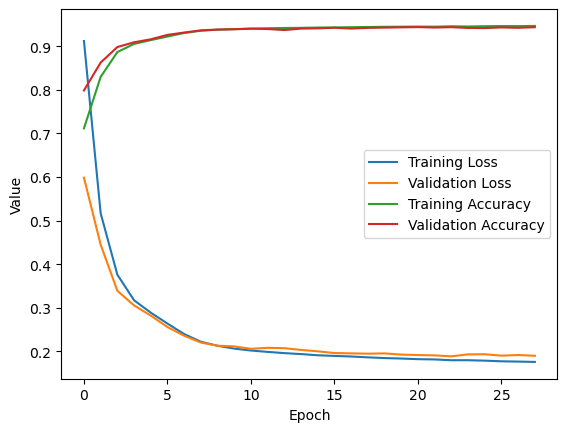

In [15]:
from keras.callbacks import EarlyStopping


# Define early stopping callback to monitor validation loss and stop if it doesn't improve for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with 20 epochs and batch size of 32, using the early stopping callback
history = model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop])

# Plot the training history for loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

# Evaluate the trained model

In [16]:
# Import the required libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

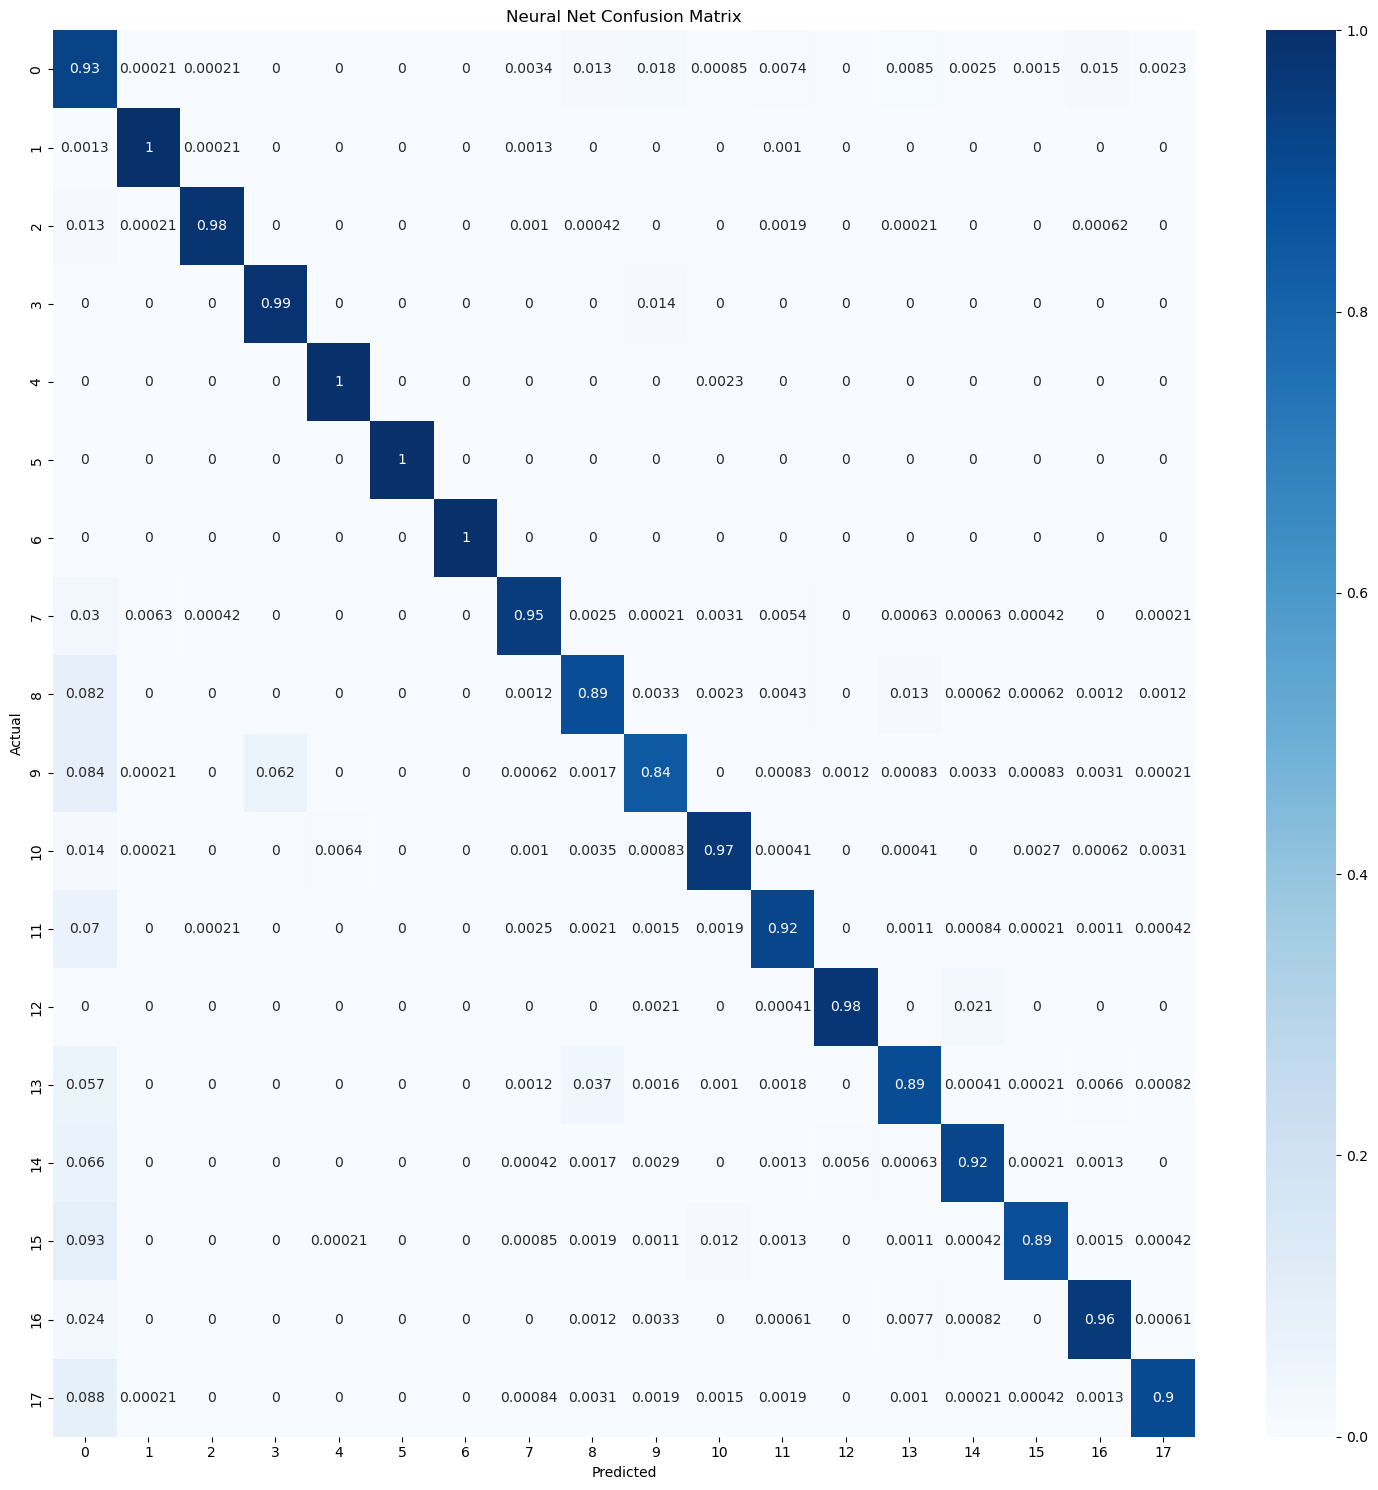

Neural Net accuracy_score: 0.9439236111111111


In [17]:


# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

y_pred = enc.inverse_transform(model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("Neural Net accuracy_score:", accuracy_score(y_true, y_pred))

# Realtime Fault Prediction

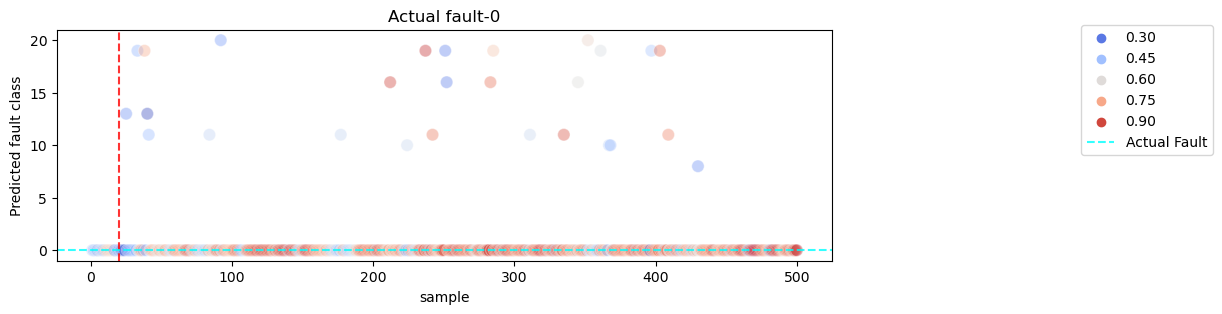

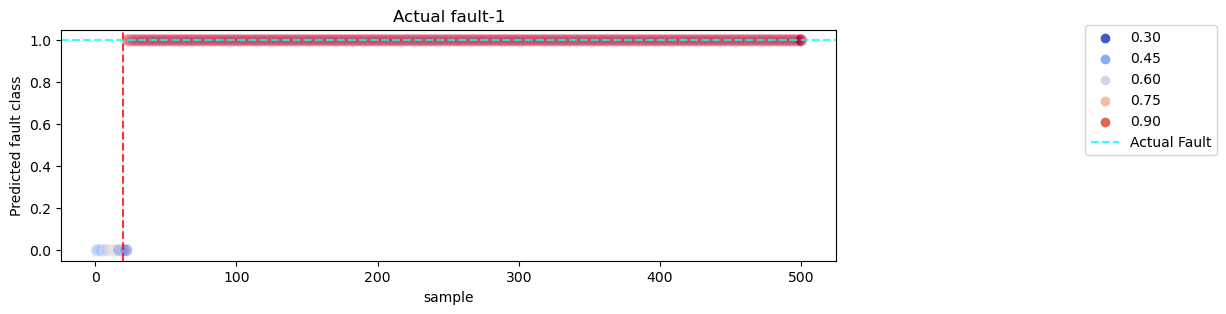

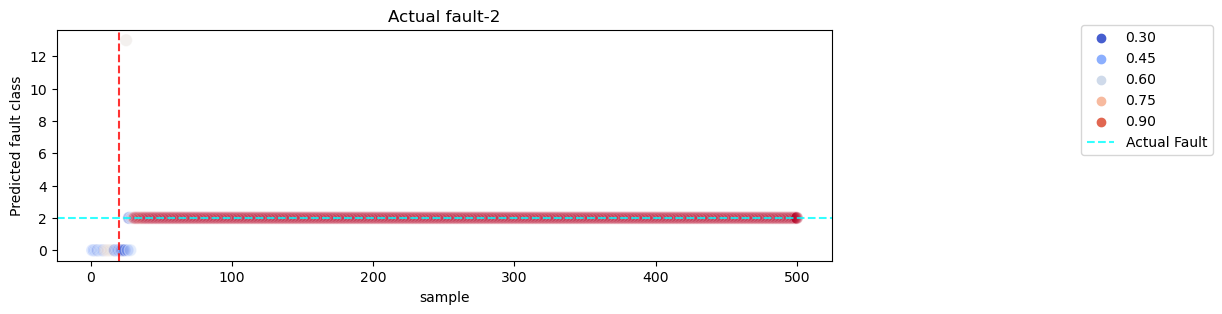

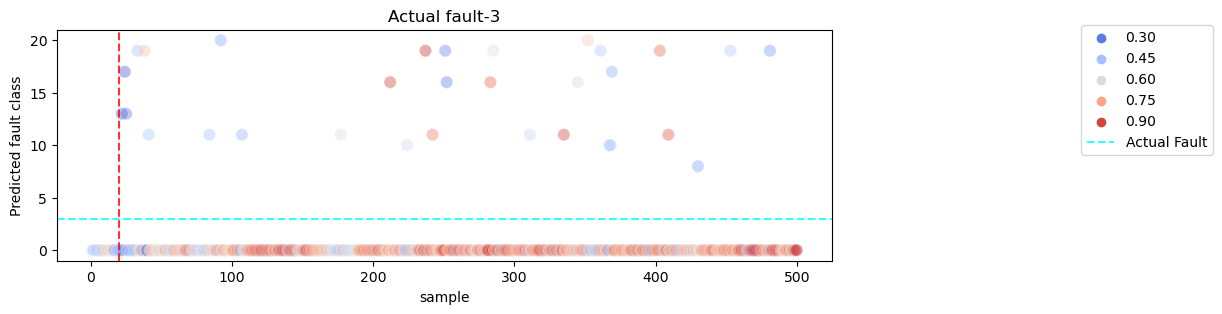

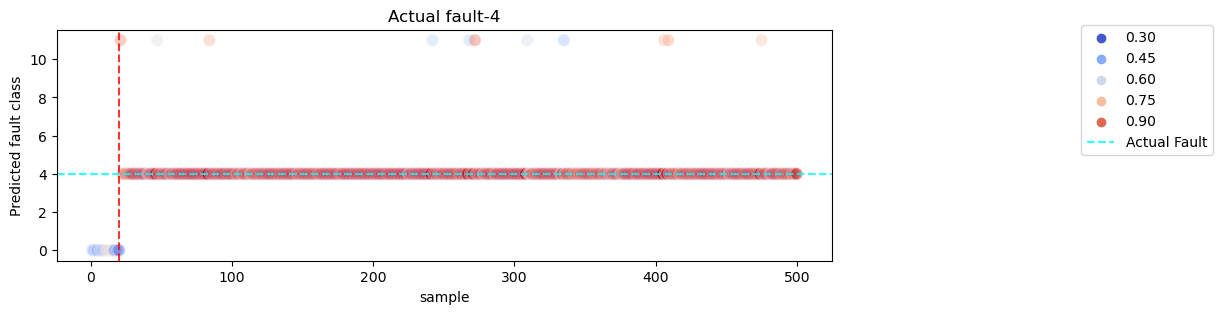

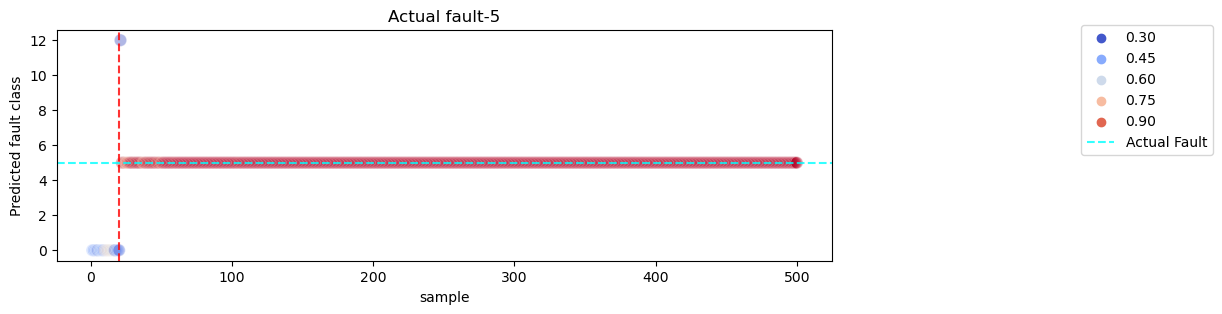

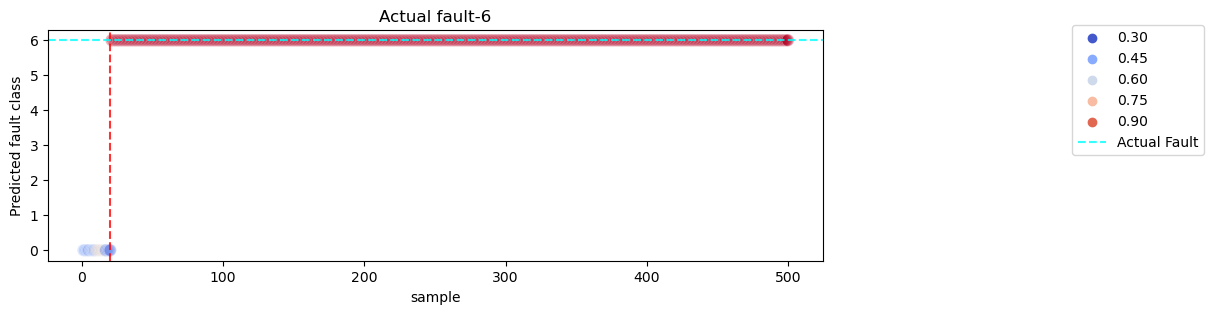

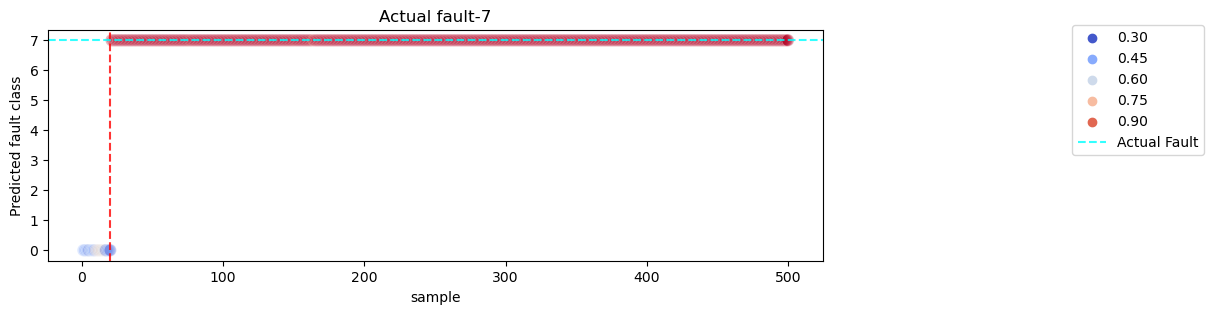

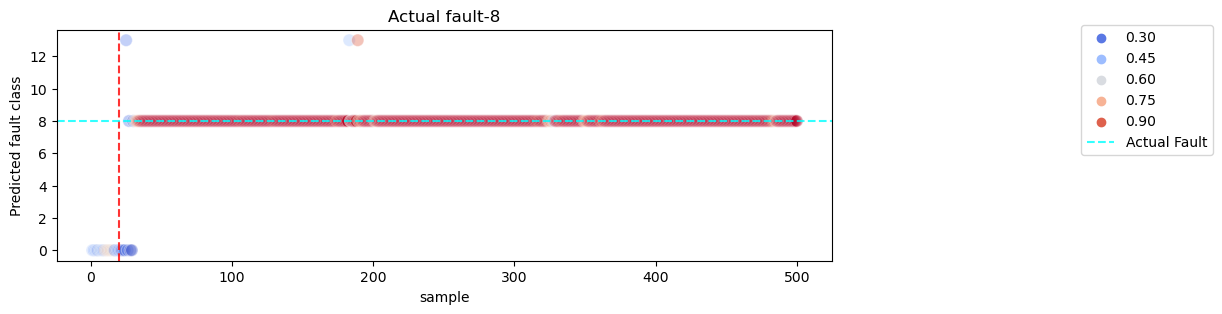

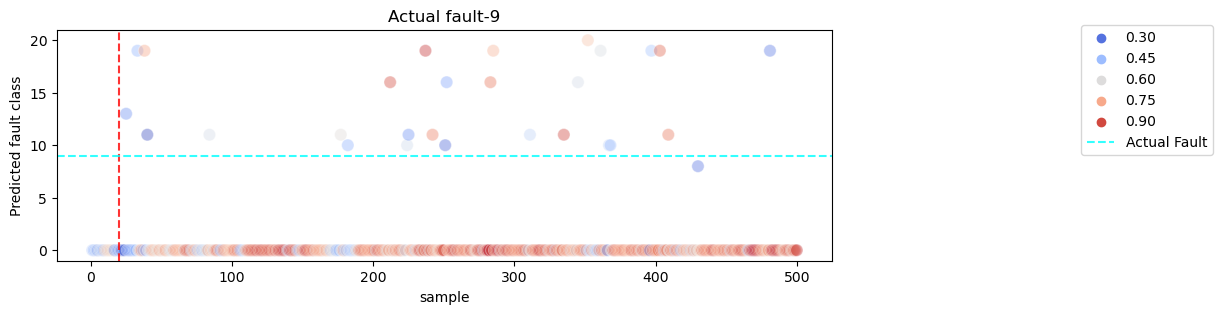

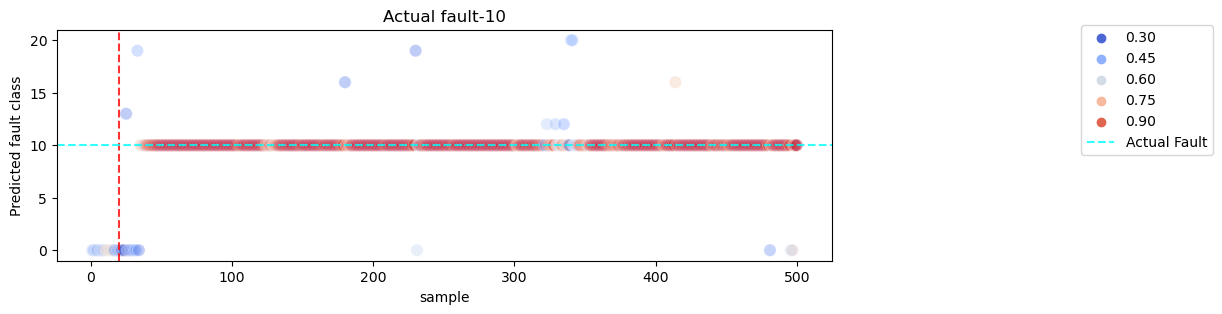

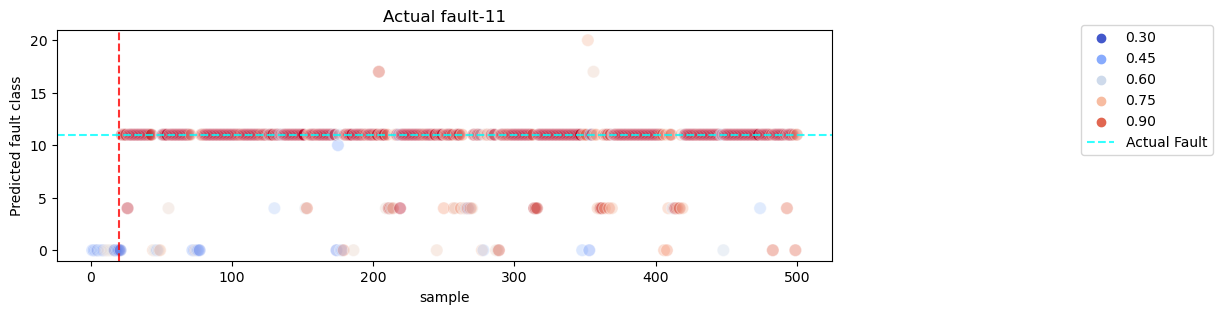

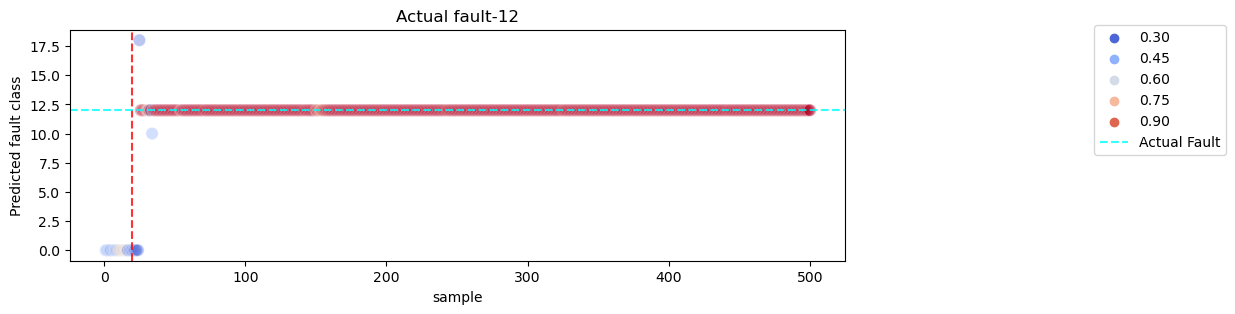

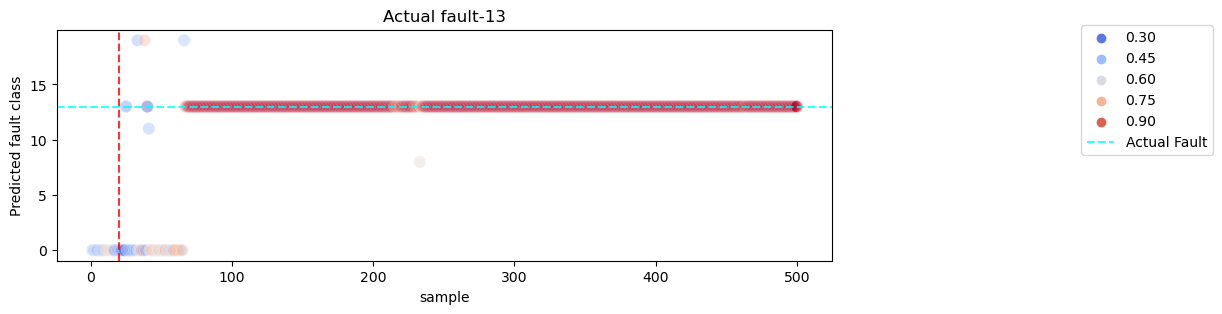

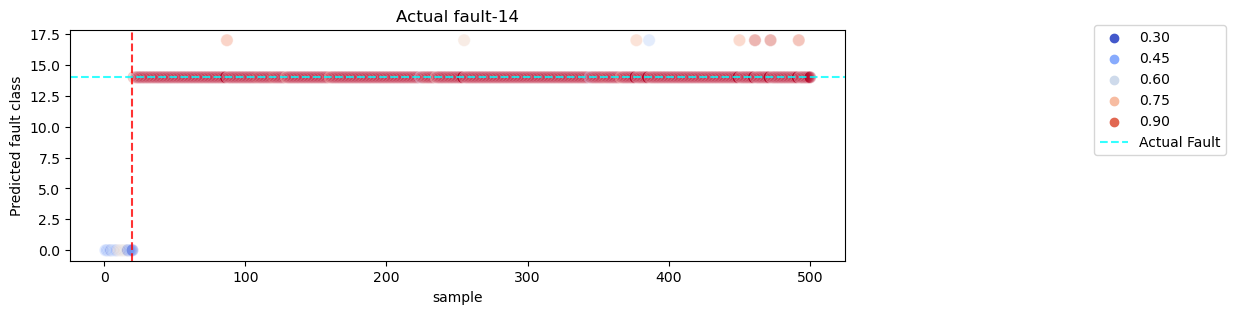

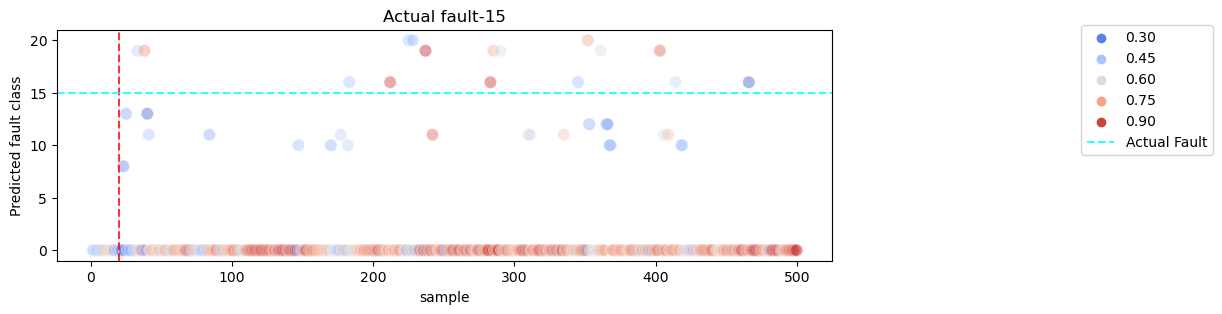

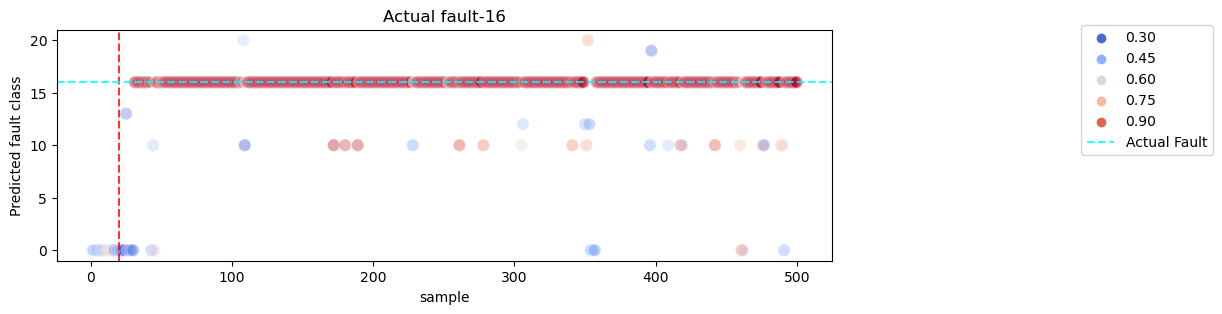

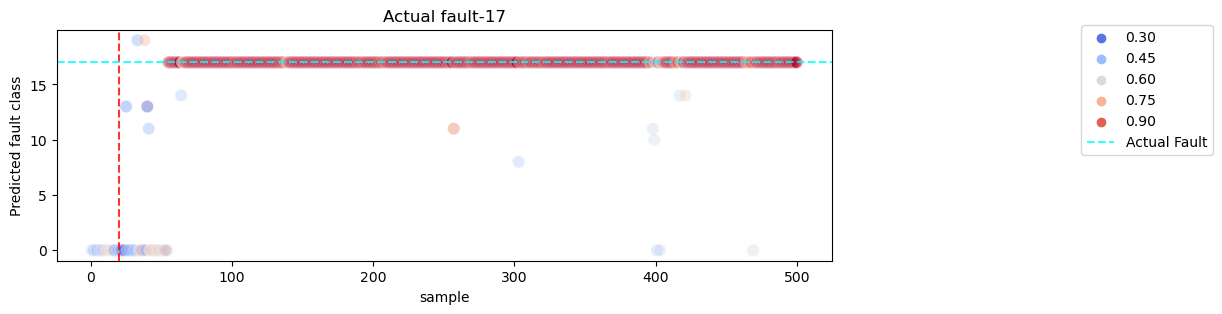

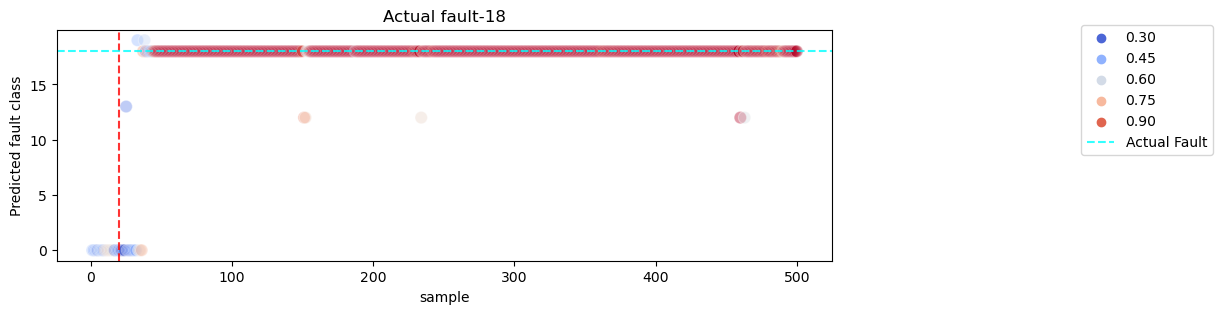

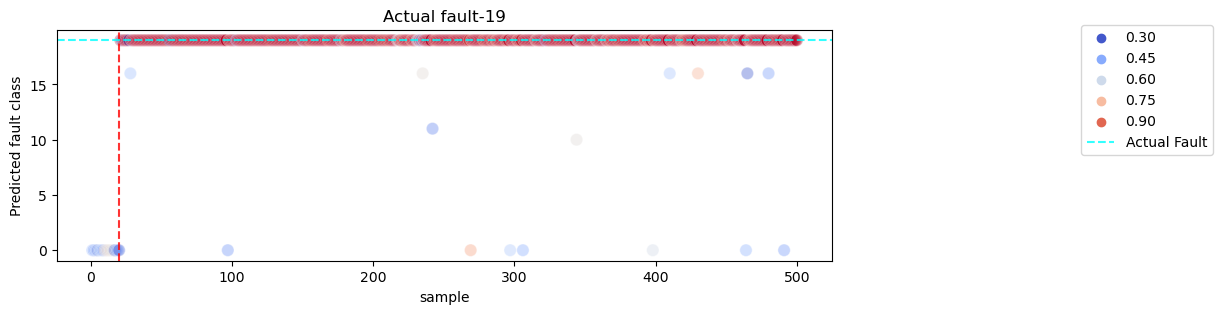

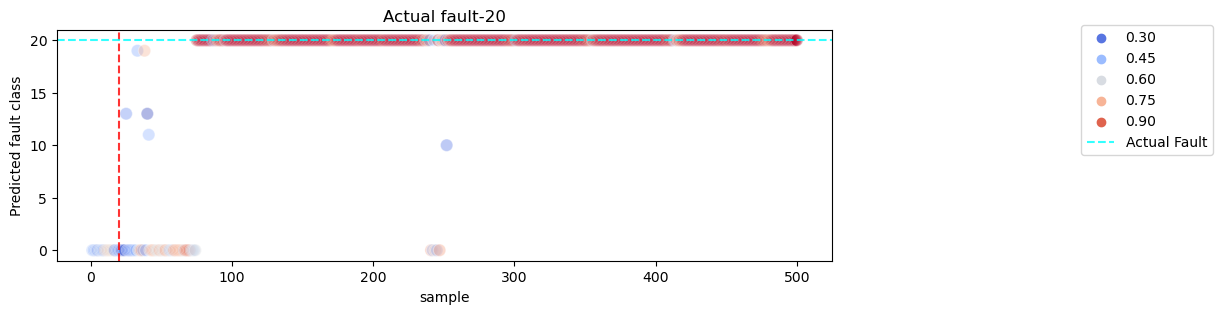

In [18]:
for F_num in range(0,21):
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==2)].copy()
    x_new = df_new.iloc[:,3:]
    x_new = sc.transform(x_new)

    y_pred = enc.inverse_transform(model.predict(x_new, verbose=0))
    y_proba = np.max(model.predict(x_new, verbose=0),axis=1)

    f, ax = plt.subplots(figsize=(10,3))
    
    sns.scatterplot(x=df_new['sample'],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()


# Obtain SIngle Accuracy Score matrice

In [19]:
Accuracy=[]
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['sample']>20) & (DF['simulationRun']==np.random.randint(1,500))]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    y_true = temp_df['faultNumber']
    
    y_pred = enc.inverse_transform(model.predict(X_faulty, verbose=0))
    
    
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    
    Accuracy.append(acc)
print("#"*20)
print(f'The overall accuracy is {np.mean(Accuracy)}')

The accuracy for Fault_num=0 is 0.9375
The accuracy for Fault_num=1 is 0.9979166666666667
The accuracy for Fault_num=2 is 0.9875
The accuracy for Fault_num=4 is 0.9708333333333333
The accuracy for Fault_num=5 is 0.9958333333333333
The accuracy for Fault_num=6 is 1.0
The accuracy for Fault_num=7 is 1.0
The accuracy for Fault_num=8 is 0.9666666666666667
The accuracy for Fault_num=10 is 0.91875
The accuracy for Fault_num=11 is 0.8666666666666667
The accuracy for Fault_num=12 is 0.9291666666666667
The accuracy for Fault_num=13 is 0.875
The accuracy for Fault_num=14 is 0.9875
The accuracy for Fault_num=16 is 0.8833333333333333
The accuracy for Fault_num=17 is 0.9145833333333333
The accuracy for Fault_num=18 is 0.93125
The accuracy for Fault_num=19 is 0.95
The accuracy for Fault_num=20 is 0.8791666666666667
####################
The overall accuracy is 0.9439814814814815


# t-sne Visualization

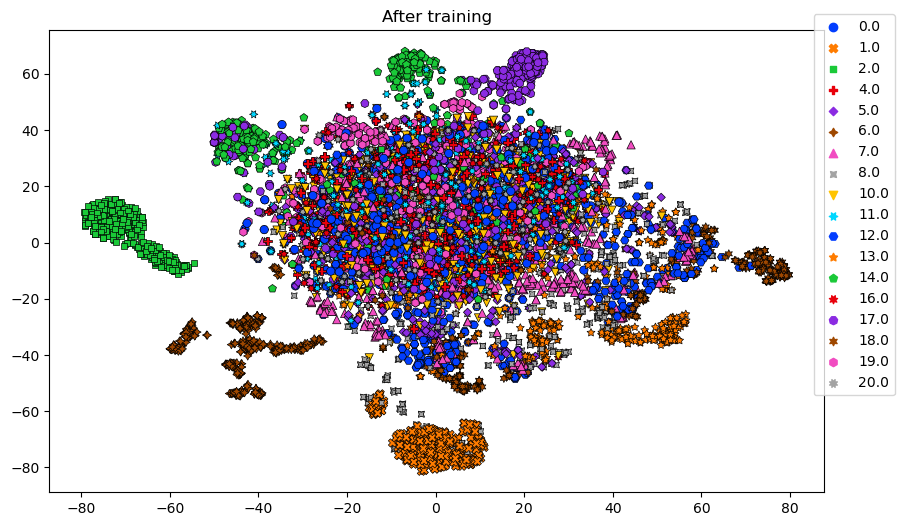

In [20]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_train[::50,:])
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

# After Training

In [21]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=model.input,outputs=model.layers[-2].output)
intermediate_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52)]              0         
                                                                 
 dense (Dense)               (None, 100)               5300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 15,400
Trainable params: 15,400
Non-trainable params: 0
_________________________________________________________________


216/216 [==============================] - 0s 1ms/step


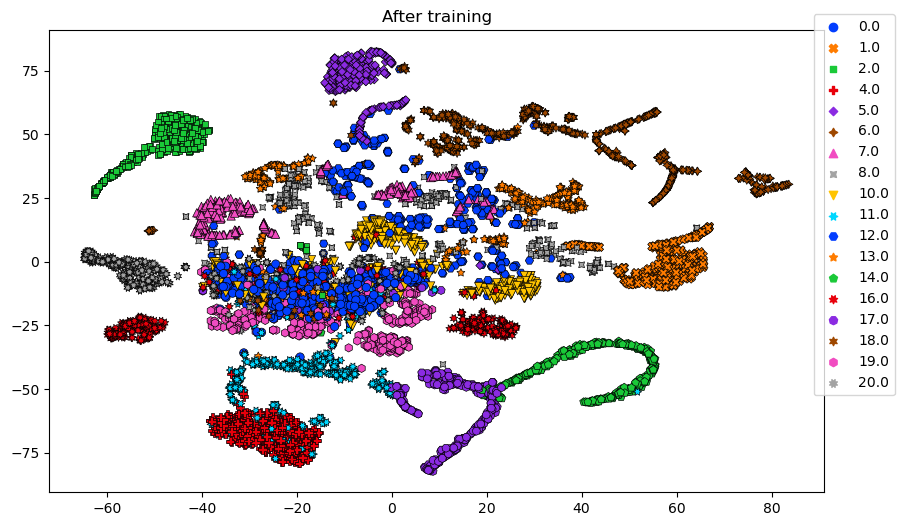

In [22]:
x_inter = intermediate_model.predict(x_train[::50,:])

x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_inter)
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="bright",edgecolor='black')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()